In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_tree

In [23]:
table = pd.read_csv('xgboost_data')

In [24]:
table.shape

(72, 8)

In [27]:
table = table.rename(columns={"AUC Train": "AUC_Train", "AUC Test 1": "AUC_TEST_1", "AUC Test 2": "AUC_TEST_2"})

In [28]:
table

,Num Trees,Learning Rate,Subsample,% in each tree,Default weight,AUC_Train,AUC_TEST_1,AUC_TEST_2
0,50,0.01,0.5,0.5,1,0.924380,0.910174,0.930421
1,50,0.01,0.5,0.5,5,0.922050,0.909058,0.927250
2,50,0.01,0.5,0.5,10,0.920620,0.907663,0.925269
3,50,0.01,0.5,1.0,1,0.921042,0.906785,0.927140
4,50,0.01,0.5,1.0,5,0.919128,0.906169,0.924692
5,50,0.01,0.5,1.0,10,0.917478,0.904487,0.922980
6,50,0.01,0.8,0.5,1,0.924364,0.909930,0.929997
7,50,0.01,0.8,0.5,5,0.922256,0.908927,0.927286
8,50,0.01,0.8,0.5,10,0.920877,0.907860,0.925578
9,50,0.01,0.8,1.0,1,0.920456,0.905909,0.926232


In [29]:
table.AUC_TEST_1[0]

0.9101742768439176

In [ ]:
pd.set_option('display.max_rows', None)
table

In [32]:
table.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Num Trees,72.0,150.000000,108.770336,50.000000,50.000000,100.000000,300.000000,300.000000
Learning Rate,72.0,0.055000,0.045316,0.010000,0.010000,0.055000,0.100000,0.100000
Subsample,72.0,0.650000,0.151053,0.500000,0.500000,0.650000,0.800000,0.800000
% in each tree,72.0,0.750000,0.251754,0.500000,0.500000,0.750000,1.000000,1.000000
Default weight,72.0,5.333333,3.707624,1.000000,1.000000,5.000000,10.000000,10.000000
AUC_Train,72.0,0.932639,0.009533,0.917182,0.924183,0.932537,0.939192,0.950346
AUC_TEST_1,72.0,0.915217,0.005302,0.903844,0.909922,0.917220,0.920085,0.921377
AUC_TEST_2,72.0,0.934974,0.006003,0.922384,0.929703,0.937150,0.940512,0.941923
AUC_AVG,72.0,0.927610,0.006818,0.914470,0.921347,0.928992,0.933365,0.937707


In [35]:
table[table['AUC_TEST_2']>0.94]

,Num Trees,Learning Rate,Subsample,% in each tree,Default weight,AUC_Train,AUC_TEST_1,AUC_TEST_2,AUC_AVG
36,100,0.1,0.5,0.5,1,0.938779,0.920320,0.940964,0.933354
37,100,0.1,0.5,0.5,5,0.938342,0.920337,0.940506,0.933062
38,100,0.1,0.5,0.5,10,0.937937,0.919834,0.940102,0.932624
39,100,0.1,0.5,1.0,1,0.939560,0.920365,0.941159,0.933695
40,100,0.1,0.5,1.0,5,0.939187,0.920294,0.940718,0.933400
41,100,0.1,0.5,1.0,10,0.938451,0.920024,0.940268,0.932914
42,100,0.1,0.8,0.5,1,0.939618,0.920615,0.941080,0.933771
43,100,0.1,0.8,0.5,5,0.939206,0.920389,0.940839,0.933478
44,100,0.1,0.8,0.5,10,0.938708,0.920018,0.940528,0.933085
45,100,0.1,0.8,1.0,1,0.940314,0.920675,0.941106,0.934032


### BEST PARAMETERS
   * n_estimators: 300
   * learning_rate: 0.1
   * subsample: 0.8
   * colsample_bytree: 0.5
   * scale_pos_weight: 1

In [36]:
train1 = pd.read_csv('train1')
test1 = pd.read_csv('test1')
test2 = pd.read_csv('test2')

In [37]:
train1.head(5)

,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,...,CO,CR,XL,XM,XZ,-1,O,R,U,target
0,201705.0,0.831622,0.009339,0.001073,0.819022,0.004489,NaN,0.000408,0.007309,NaN,...,1,0,0,0,0,0,0,0,1,0
1,201705.0,0.356131,0.918839,0.434504,0.007948,0.507214,0.185023,0.712065,0.535326,NaN,...,1,0,0,0,0,0,0,1,0,0
2,201705.0,1.007714,0.032244,0.028340,1.008792,0.001313,0.024037,0.004370,0.006013,NaN,...,0,1,0,0,0,0,1,0,0,0
3,201705.0,0.567601,0.065138,0.238893,0.046778,0.000630,0.121021,0.006905,0.264823,NaN,...,1,0,0,0,0,0,1,0,0,0
4,201705.0,0.461035,0.009727,0.103340,0.088649,0.503405,0.509922,0.007968,0.194580,NaN,...,1,0,0,0,0,0,0,1,0,1


In [38]:
X_train = train1.drop(['target'], axis = 1)
Y_train = train1['target']
X_test1 = test1.drop(['target'], axis = 1)
Y_test1 = test1['target']
X_test2 = test2.drop(['target'], axis = 1)
Y_test2 = test2['target']

In [39]:
feature1 = pd.read_csv('features_default')
feature2 = pd.read_csv('features_parameters')
final_feature = pd.concat([feature1,feature2])
final_feature = final_feature.Feature.unique()

FileNotFoundError: [Errno 2] No such file or directory: 'features_default'

In [32]:
feature = pd.read_csv('final_features')

In [33]:
feature

,0
0,P_2
1,B_1
2,B_9
3,D_44
4,D_42
5,B_3
6,S_3
7,D_45
8,D_48
9,D_51


In [11]:
final_feature

array(['P_2', 'B_1', 'B_9', 'D_44', 'D_42', 'B_3', 'S_3', 'D_45', 'D_48',
       'D_51', 'R_1', 'B_7', 'D_66', 'R_27', 'D_43', 'B_2', 'B_11',
       'D_50', 'B_38', 'D_132', 'B_4', 'D_41', 'S_23', 'D_62', 'B_39',
       'D_75', 'D_77', 'B_18', 'D_46', 'B_5', 'R_3', 'D_49', 'R_26',
       'D_56', 'CO', 'S_2', 'B_6', 'B_10', 'D_61', 'D_52', 'S_7', 'O',
       'D_55', 'D_112', 'P_3'], dtype=object)

In [40]:
X_train = X_train[['P_2', 'B_1', 'B_9', 'D_44', 'D_42', 'B_3', 'S_3', 'D_45', 'D_48','D_51', 'R_1', 'B_7', 'D_66', 'R_27', 'D_43', 'B_2', 'B_11','D_50', 'B_38', 'D_132', 'B_4', 'D_41', 'S_23', 'D_62', 'B_39','D_75', 'D_77', 'B_18', 'D_46', 'B_5', 'R_3', 'D_49', 'R_26','D_56', 'CO', 'S_2', 'B_6', 'B_10', 'D_61', 'D_52', 'S_7', 'O','D_55', 'D_112', 'P_3']]
X_test1 = X_test1[['P_2', 'B_1', 'B_9', 'D_44', 'D_42', 'B_3', 'S_3', 'D_45', 'D_48', 'D_51', 'R_1', 'B_7', 'D_66', 'R_27', 'D_43', 'B_2', 'B_11','D_50', 'B_38', 'D_132', 'B_4', 'D_41', 'S_23', 'D_62', 'B_39','D_75', 'D_77', 'B_18', 'D_46', 'B_5', 'R_3', 'D_49', 'R_26','D_56', 'CO', 'S_2', 'B_6', 'B_10', 'D_61', 'D_52', 'S_7', 'O','D_55', 'D_112', 'P_3']]
X_test2 = X_test2[['P_2', 'B_1', 'B_9', 'D_44', 'D_42', 'B_3', 'S_3', 'D_45', 'D_48', 'D_51', 'R_1', 'B_7', 'D_66', 'R_27', 'D_43', 'B_2', 'B_11','D_50', 'B_38', 'D_132', 'B_4', 'D_41', 'S_23', 'D_62', 'B_39','D_75', 'D_77', 'B_18', 'D_46', 'B_5', 'R_3', 'D_49', 'R_26','D_56', 'CO', 'S_2', 'B_6', 'B_10', 'D_61', 'D_52', 'S_7', 'O','D_55', 'D_112', 'P_3']]


In [41]:
X_train.head()

,P_2,B_1,B_9,D_44,D_42,B_3,S_3,D_45,D_48,D_51,...,S_2,B_6,B_10,D_61,D_52,S_7,O,D_55,D_112,P_3
0,0.831622,0.001073,0.002065,0.006533,NaN,0.007309,NaN,0.320768,0.023700,0.342399,...,201705.0,0.131650,0.297613,0.020038,0.388173,NaN,0,0.045015,1.002177,0.624031
1,0.356131,0.434504,0.664038,0.506712,NaN,0.535326,0.185023,0.366323,0.969462,0.000450,...,201705.0,0.011664,0.045411,1.006224,0.034114,0.148782,0,0.901045,0.008407,0.770095
2,1.007714,0.028340,0.007222,0.006935,NaN,0.006013,0.024037,0.700798,0.035438,1.333454,...,201705.0,0.198684,0.300508,0.030544,0.276372,0.033754,1,0.023020,1.002950,0.639568
3,0.567601,0.238893,0.454560,0.006848,NaN,0.264823,0.121021,0.047450,0.443533,0.004662,...,201705.0,0.029079,0.055822,0.501846,0.094042,0.092767,1,0.571485,1.008441,0.651428
4,0.461035,0.103340,0.285114,0.129193,NaN,0.194580,0.509922,0.061285,0.515588,0.004358,...,201705.0,0.029273,0.050712,0.542049,0.099400,0.437193,0,0.277744,1.007595,0.359532


In [42]:
X_test1.head()

,P_2,B_1,B_9,D_44,D_42,B_3,S_3,D_45,D_48,D_51,...,S_2,B_6,B_10,D_61,D_52,S_7,O,D_55,D_112,P_3
0,0.938469,0.008724,0.008207,0.000630,NaN,0.004709,0.124035,0.708906,0.255736,1.335856,...,201703.0,0.063902,0.096219,0.308233,0.207334,0.161345,1,0.354596,1.007336,0.736463
1,0.865491,0.017013,0.015216,0.007827,NaN,0.009356,0.094334,0.221665,0.074410,0.670573,...,201703.0,0.175040,0.299979,0.081322,0.439342,0.061494,1,0.081542,1.001776,0.643930
2,0.908951,0.026205,0.000423,0.004060,NaN,0.007648,0.450903,0.639124,0.024605,0.006345,...,201703.0,0.154660,0.297678,0.027045,0.218064,0.454965,0,0.046631,1.006755,0.712840
3,0.296622,0.166906,0.605279,0.380032,NaN,0.629763,0.246189,0.301320,0.934939,0.004867,...,201703.0,0.004924,0.018741,0.914208,0.031082,0.166743,1,0.899729,1.000059,0.510503
4,0.688031,0.007714,0.000953,0.001556,NaN,0.010699,0.148278,0.295369,NaN,0.000881,...,201703.0,0.153139,0.302372,NaN,0.239804,0.103204,1,0.040528,1.008196,0.552836


In [43]:
X_test2.head()

,P_2,B_1,B_9,D_44,D_42,B_3,S_3,D_45,D_48,D_51,...,S_2,B_6,B_10,D_61,D_52,S_7,O,D_55,D_112,P_3
0,0.668094,0.458564,0.667993,0.133904,NaN,0.334927,0.538491,0.103864,0.626887,0.009884,...,201802.0,0.010332,0.010245,0.926653,0.076106,0.457081,1,0.597964,1.009997,0.618889
1,0.896509,0.003852,0.004899,0.003906,NaN,0.002179,NaN,0.422604,0.033743,0.002639,...,201802.0,0.215212,0.293721,0.037294,0.068421,NaN,1,0.027595,1.000168,0.646726
2,0.412922,0.494850,0.643951,0.506555,NaN,0.931195,0.157808,0.061725,0.919327,0.005786,...,201802.0,0.007850,0.015013,0.898326,0.045186,0.101974,0,0.811708,1.004607,0.650838
3,1.001667,0.004584,0.000870,0.006615,NaN,0.010602,0.182692,0.473836,0.022484,0.339042,...,201802.0,0.165992,0.294408,0.024889,0.184134,0.112482,1,0.037072,1.009943,0.724129
4,0.778748,0.023771,0.015591,0.000094,NaN,0.034865,0.180929,0.052512,0.086994,0.334797,...,201802.0,0.087482,0.164241,0.124744,0.278968,0.204161,0,0.070156,1.001108,0.744356


In [44]:
X_train.shape

(309097, 45)

In [45]:
xgb_instance = xgb.XGBClassifier(n_estimators=300, learning_rate = 0.1, subsample = 0.8, colsample_bytree = 0.5, scale_pos_weight = 1, random_state = 7)
final_model = xgb_instance.fit(X_train, Y_train)

In [119]:
final_model.predict(X_train)

array([0, 1, 0, ..., 1, 1, 0])

In [120]:
final_model.predict_proba(X_train)

array([[0.9986432 , 0.00135681],
       [0.2138784 , 0.7861216 ],
       [0.9986592 , 0.0013408 ],
       ...,
       [0.12061661, 0.8793834 ],
       [0.1310054 , 0.8689946 ],
       [0.9979259 , 0.00207415]], dtype=float32)

## SHAP

In [114]:
import shap
shap.initjs()
explainer = shap.Explainer(final_model)


c:\users\nagas\appdata\local\programs\python\python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [115]:
shap_values = explainer(X_test2)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [116]:
shap_values

.values =
array([[-8.1765234e-02,  2.4220206e-01,  2.9536030e-01, ...,
         1.4622514e-02,  2.6817145e-02, -1.5636155e-01],
       [-1.4077538e+00, -1.9004370e-01, -1.5476133e-01, ...,
         3.4452498e-02, -6.2158179e-02, -8.2777672e-02],
       [ 5.5068642e-01,  1.6960631e-01,  2.8257522e-01, ...,
        -1.1106882e-04, -5.5163104e-02, -9.4282463e-02],
       ...,
       [ 1.6416126e-01, -1.7120990e-01,  1.1344661e-01, ...,
         2.0220939e-02, -7.7427849e-02, -6.8185270e-02],
       [-3.0884171e-01, -2.1566281e-01, -1.4345026e-01, ...,
        -7.6114334e-02, -8.4708847e-02,  1.6944796e-01],
       [-1.4632355e+00,  4.3719914e-02, -1.6720353e-01, ...,
        -3.5414122e-02, -2.5787033e-02, -1.5878154e-01]], dtype=float32)

.base_values =
array([-1.2867206, -1.2867206, -1.2867206, ..., -1.2867206, -1.2867206,
       -1.2867206], dtype=float32)

.data =
array([[6.68093959e-01, 4.58563893e-01, 6.67992620e-01, ...,
        5.97963750e-01, 1.00999673e+00, 6.18889439e-01],
    

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


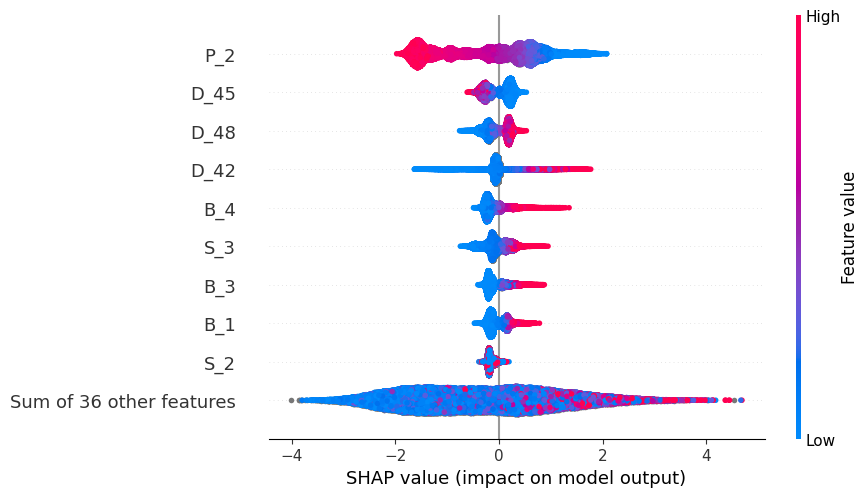

In [117]:
shap.plots.beeswarm(shap_values)

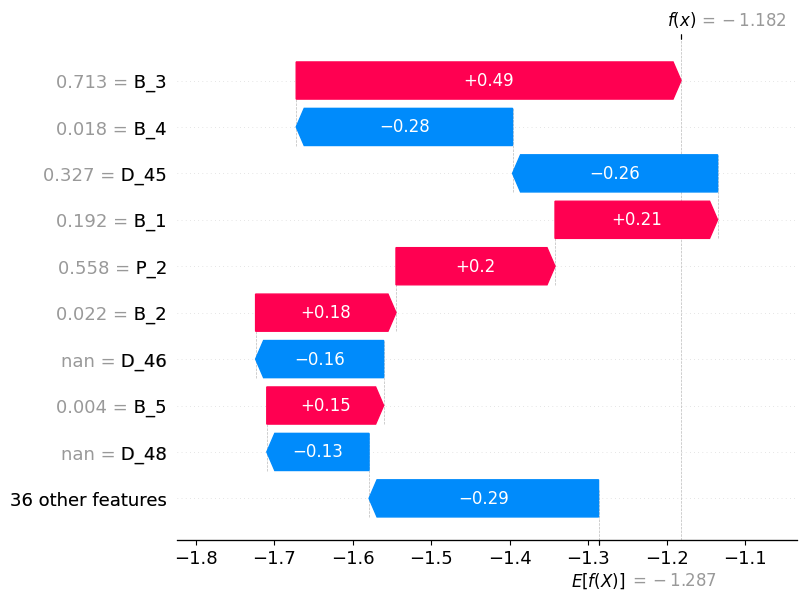

In [118]:
shap.plots.waterfall(shap_values[397])

## Bad rate for train

In [87]:
perf_train_data = pd.DataFrame({"Actual": train1['target'], "Prediction": final_model.predict_proba(X_train)[:,1]})
quantiles = list(set(perf_train_data.Prediction.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
quantiles.sort()
quantiles.insert(0,0)
quantiles.insert(len(quantiles),1)

perf_train_data["Score Bins"] = pd.cut(perf_train_data["Prediction"], quantiles)
stat = perf_train_data.groupby("Score Bins")["Actual"].agg(["sum", "count"]).reset_index()
stat["Bad Rate"] = stat["sum"] / stat["count"]
stat['Score Bins'] = stat['Score Bins'].astype(str)
stat

,Score Bins,sum,count,Bad Rate
0,"(0.0, 0.00191]",3,30910,0.000097
1,"(0.00191, 0.0039]",34,30910,0.001100
2,"(0.0039, 0.00817]",84,30909,0.002718
3,"(0.00817, 0.0197]",276,30910,0.008929
4,"(0.0197, 0.0567]",719,30910,0.023261
5,"(0.0567, 0.176]",2695,30909,0.087191
6,"(0.176, 0.401]",8031,30910,0.259819
7,"(0.401, 0.63]",15755,30909,0.509722
8,"(0.63, 0.81]",23269,30910,0.752798
9,"(0.81, 1.0]",28897,30910,0.934875


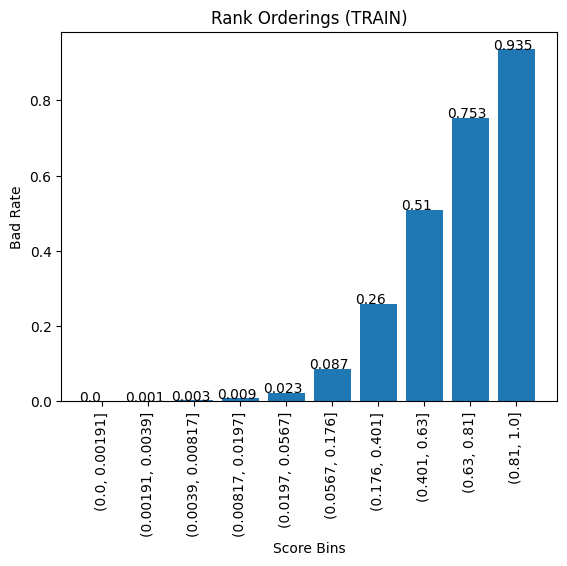

In [110]:
plt.bar(stat['Score Bins'],stat['Bad Rate'])
plt.xticks(rotation=90)
xlab = 'Score Bins'
ylab = 'Bad Rate'
title = 'Rank Orderings (TRAIN)'
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)
for index, value in enumerate(stat['Bad Rate']):
    plt.text(index-0.5, value,
             str(round(value,3)))
plt.show()

## Bad rate for test1 & test2

In [91]:
perf_train_data = pd.DataFrame({"Actual": test1['target'], "Prediction": final_model.predict_proba(X_test1)[:,1]})

perf_train_data["Score Bins"] = pd.cut(perf_train_data["Prediction"], quantiles)
stat1 = perf_train_data.groupby("Score Bins")["Actual"].agg(["sum", "count"]).reset_index()
stat1["Bad Rate"] = stat1["sum"] / stat1["count"]
stat1['Score Bins'] = stat1['Score Bins'].astype(str)
stat1

,Score Bins,sum,count,Bad Rate
0,"(0.0, 0.00191]",5,5889,0.000849
1,"(0.00191, 0.0039]",16,7571,0.002113
2,"(0.0039, 0.00817]",58,8216,0.007059
3,"(0.00817, 0.0197]",106,8130,0.013038
4,"(0.0197, 0.0567]",334,8259,0.040441
5,"(0.0567, 0.176]",1015,8105,0.125231
6,"(0.176, 0.401]",2402,7879,0.304861
7,"(0.401, 0.63]",4014,7614,0.527187
8,"(0.63, 0.81]",5027,7039,0.714164
9,"(0.81, 1.0]",4520,5368,0.842027


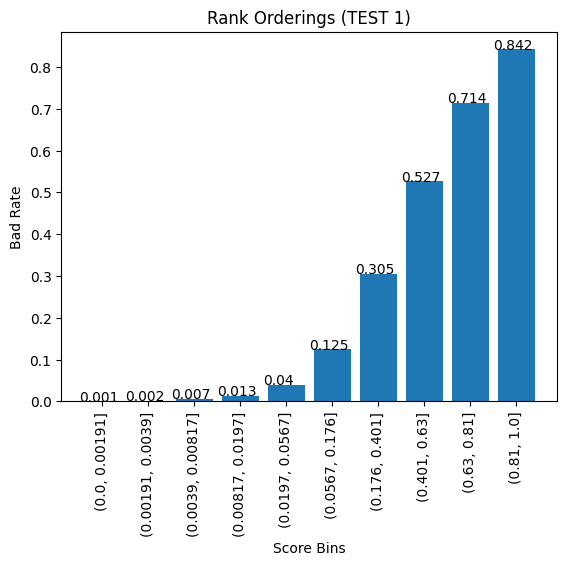

In [111]:
plt.bar(stat1['Score Bins'],stat1['Bad Rate'])
plt.xticks(rotation=90)
xlab = 'Score Bins'
ylab = 'Bad Rate'
title = 'Rank Orderings (TEST 1)'
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)
for index, value in enumerate(stat1['Bad Rate']):
    plt.text(index-0.5, value,
             str(round(value,3)))
plt.show()

In [107]:
perf_train_data = pd.DataFrame({"Actual": test2['target'], "Prediction": final_model.predict_proba(X_test2)[:,1]})

perf_train_data["Score Bins"] = pd.cut(perf_train_data["Prediction"], quantiles)
stat2 = perf_train_data.groupby("Score Bins")["Actual"].agg(["sum", "count"]).reset_index()
stat2["Bad Rate"] = stat2["sum"] / stat2["count"]
stat2['Score Bins'] = stat2['Score Bins'].astype(str)
stat2

,Score Bins,sum,count,Bad Rate
0,"(0.0, 0.00191]",6,8147,0.000736
1,"(0.00191, 0.0039]",17,6826,0.002490
2,"(0.0039, 0.00817]",26,6544,0.003973
3,"(0.00817, 0.0197]",63,6558,0.009607
4,"(0.0197, 0.0567]",160,6687,0.023927
5,"(0.0567, 0.176]",646,7159,0.090236
6,"(0.176, 0.401]",1821,7430,0.245087
7,"(0.401, 0.63]",3629,7780,0.466452
8,"(0.63, 0.81]",5525,7973,0.692964
9,"(0.81, 1.0]",9675,10642,0.909134


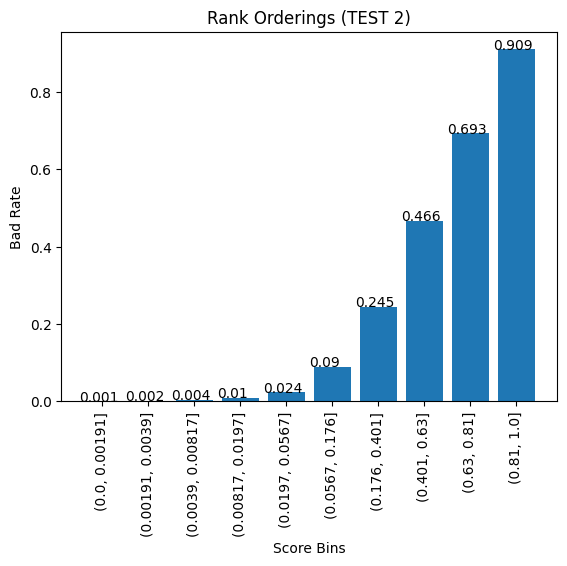

In [112]:
plt.bar(stat2['Score Bins'],stat2['Bad Rate'])
plt.xticks(rotation=90)
xlab = 'Score Bins'
ylab = 'Bad Rate'
title = 'Rank Orderings (TEST 2)'
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)
for index, value in enumerate(stat2['Bad Rate']):
    plt.text(index-0.5, value,
             str(round(value,3)))
plt.show()

In [93]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(Y_train,final_model.predict(X_train)))
accuracy_score(Y_train,final_model.predict(X_train))

[[211655  17679]
 [ 17373  62390]]


0.8865987052608081

In [94]:
print(confusion_matrix(Y_test1,final_model.predict(X_test1)))
accuracy_score(Y_test1,final_model.predict(X_test1))

[[51825  4748]
 [ 5430 12067]]


0.8625894424193331

In [95]:
print(confusion_matrix(Y_test2,final_model.predict(X_test2)))
accuracy_score(Y_test2,final_model.predict(X_test2))

[[48521  5657]
 [ 4000 17568]]


0.87250811924062

## SAVE FINAL MODEL

In [102]:
final_model.save_model("final_model.json")